<a href="https://colab.research.google.com/github/luislauriano/Data_Science/blob/master/previs%C3%A3o_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criação de modelo preditivo de Ocorrência de Diabetes**

# **Obtenção de dados**

**Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle**

O conjunto de dados que vamos utilizar foi retirado e pode ser encontrado no kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias em um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade da herança indígena Pima. 

O conjunto de dados consiste em diversas variáveis ​​de previsão médica e uma variável de destino, resultado. As variáveis ​​preditoras, dados de entrada, incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

Considere a variável **Resultado** com valor 1 para True e 0 para False

**Informações sobre os atributos**



*   Pregnancies / Gravidez - Mês em que se encontra a gestação 
*   Glucose / Glicose - Concentração de glicose no plasma duas horas em um teste oral de tolerância à glicose
* Blood Pressure  / Pressão sanguínea - Pressão arterial diastólica (mm Hg)
* SkinThickness / Espessura da pele - Tríceps espessura da dobra da pele (mm)
* Isulin / Insulina - Insulina sérica de 2 horas (mu U / ml)
* BMI / IMC - Índice de massa corporal (peso em kg / (altura em m) ^ 2)
* Diabetes Pedigree Function / Função de pedigree do diabéticos - Função pedigree do diabéticos
* Age / Idade 
*Outcome / Resultado - A variável de classe (0 ou 1)




**Importar os dados**

> Nesta etapa inicial importaremos o dataset mencionado anteriormente e as bibliotecas que iremos utilizar

In [1]:
pip install pywaffle

     |████████████████████████████████| 532kB 2.8MB/s 


In [0]:
#Importando os modulos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import sklearn
from pywaffle import Waffle

In [0]:
#Carregando o dataset

df = pd.read_csv('https://raw.githubusercontent.com/luislauriano/Data_Science/master/Datasets/diabetes.csv')

# **Explorando e preparando os dados**

**Qual o tamanho e tipo dos atributos do dataset?**

In [4]:
#Verificando o formato dos dados

print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')
print('\n')
df.dtypes

Linhas: 768
Colunas: 9




Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

O nosso dataset contém 768 linhas e 9 colunas, a coluna **Resultado** que é o nosso dados de saída, o que queremos prever é do tipo inteiro, maioria entre os atributos.

In [5]:
#Verificando as primeiras linhas do dataset

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


A renomeação das colunas é sempre importante para facilitar o entendimento e o uso das colunas em nosso código, então vamos renomear as colunas para o português. 

In [6]:
#Renomeando as colunas
df.columns = ['Gravidez', 'Glicose', 'Pressão_Sanguinea', 'Espessura_da_pele', 'Insulina', 'IMC', 'Função_pedigree_dos_diabeticos', 'Idade', 'Resultado']

df.head(5)

,Gravidez,Glicose,Pressão_Sanguinea,Espessura_da_pele,Insulina,IMC,Função_pedigree_dos_diabeticos,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Verificando as ultimas linhas do dataset

df.tail(5)

,Gravidez,Glicose,Pressão_Sanguinea,Espessura_da_pele,Insulina,IMC,Função_pedigree_dos_diabeticos,Idade,Resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


É sempre bom lembrar que a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes, por isso, sempre devemos verificar a quantidade de valores ausentes ou nulos presentes em nosso dataset.

In [8]:
#Verificando se existem valores ausentes
df.isnull().sum()


Gravidez                          0
Glicose                           0
Pressão_Sanguinea                 0
Espessura_da_pele                 0
Insulina                          0
IMC                               0
Função_pedigree_dos_diabeticos    0
Idade                             0
Resultado                         0
dtype: int64

Como observado, nosso dataset não contém valores ausentes ou nulos, diminuindo a rigidez na preparação e tratamento dos dados. 

Vamos agora identificar e visualizar a **correlação entre as variáveis**. Considere o coeficiente de correlação: 


*   +1  = Forte correlação positiva
*   0   = Não há correlação
*  -1  = Forte correlação negativa




In [9]:
# Visualizando a correlação em tabela
df.corr()

,Gravidez,Glicose,Pressão_Sanguinea,Espessura_da_pele,Insulina,IMC,Função_pedigree_dos_diabeticos,Idade,Resultado
Gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pressão_Sanguinea,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Espessura_da_pele,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Função_pedigree_dos_diabeticos,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Esse processo é importante para saber quais são as variáveis mais relevantes para se usar na construção do modelo preditivo. Uma correlação positiva indica que se o valor de uma variável aumenta o da outra variável também aumenta, uma correlação negativa indica que se o valor de uma variável aumenta o da outra variável diminui, porém, na escolha das variáveis relevantes para a construção do modelo, não se deve levar em conta apenas esse fator. Lembre: Correlação não implica causalidade.



Vamos construir um gráfico para visualizar melhor a correlação.

In [0]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=45)

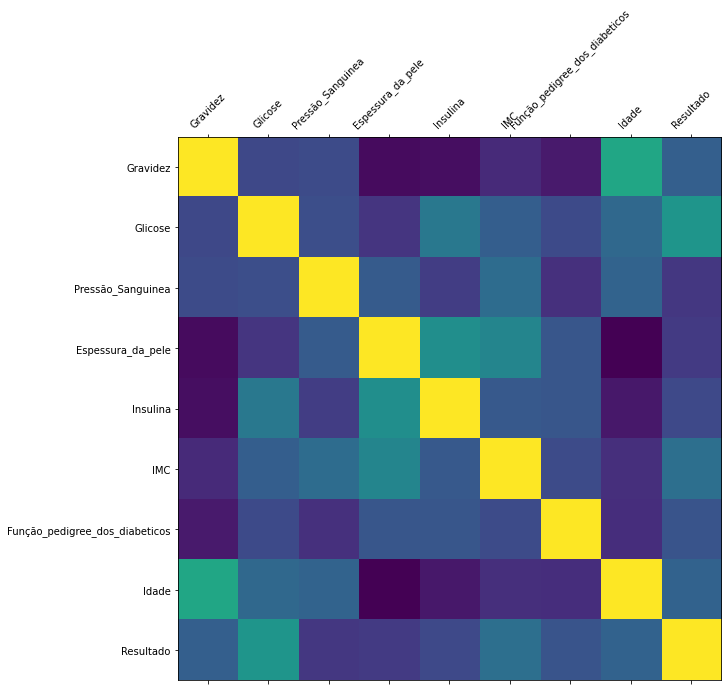

In [11]:
#Criando o gráfico a partir da função que criamos
plot_corr(df)

Na diagonal, os quadrados em amarelo representam a correlação de uma variável com ela mesma, por isso possui uma forte correlação positiva.

**Seleção das variaveis de entrada e saída**

A seleção das variáveis é uma etapa muito importante, deve ser selecionada aquelas variáveis mais relevantes. Para isso você deve fazer análise de correlações, o feature selection e aplicar um algoritmo de Machine Learning para buscar as variáveis mais relevantes. Como o nosso dataset é um conjunto de dados pequeno e que não possui valores nulos nas variáveis, iremos utilizar todas as variáveis do dataset como dados de entrada, exceto a variavável resultado que será a nossa saída esperada.

Vamos agora selecionar as **variáveis que serão os nossos dados de entrada (Atributos)**:

In [0]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['Gravidez', 'Glicose', 'Pressão_Sanguinea', 'Espessura_da_pele', 'Insulina', 'IMC', 'Função_pedigree_dos_diabeticos', 'Idade']


Agora iremos selecionar a **variável Target, aquilo que queremos prever**:

In [0]:
# Variável a ser prevista
atrib_prev = ['Resultado']

**Transformando dados de entrada em X e dados de saída em Y**

Vamos agora transformar os nossos dados de entrada em **X** e os dados de saída, o que queremos prever em **Y**. X é o nosso input e Y o nosso output, o que queremos que o algoritmo descubra é representado pela função **G = X -> Y**. 

In [0]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [15]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

Agora que já definirmos nossos dados de entrada e saída, vamos continuar a preparação dos dados.

Vamos agora transformar as linhas da coluna **Resultado** que possui True ou False em 1 se for True e em 0 se for False. Assim, os dados de saída e a previsão esperada irá informar 1 para as pessoas que tem diabete e 0 para as que não tem diabete. 

In [0]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [0]:
df['Resultado'] = df['Resultado'].replace({True: 1, False: 0})

In [0]:
# Aplicando o mapeamento ao dataset com a função map
df['Resultado'] = df['Resultado'].map(diabetes_map)

Antes de dividirmos o nosso dataset em dados de treino e teste, vamos verificar como os dados do nosso conjunto estão distribuídos, quantas pessoas tem diabete e quantas não tem em nosso dataset.

In [19]:
#Verificando a distribuição dos dados
num_true = len(df.query('Resultado == True'))
num_false = len(df.query('Resultado == False'))

print(f"Número de Casos Verdadeiros: {num_true} ({num_true / (num_true + num_false) * 100: .2f}%)")
print(f"Número de Falsos: {num_false} ({num_false / (num_false + num_true) * 100: .2f}%)")

Número de Casos Verdadeiros: 268 ( 34.90%)
Número de Falsos: 500 ( 65.10%)


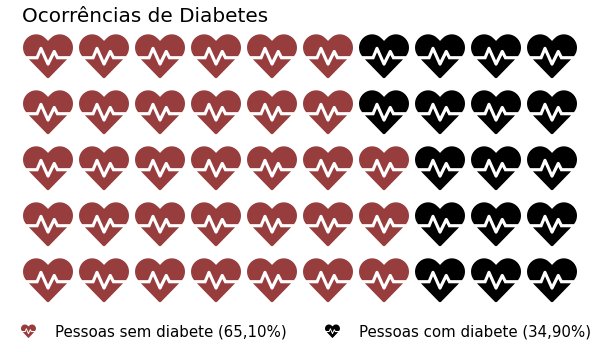

In [20]:
data = df.Resultado.value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=10,
                colors=("#983D3D", "#000000"),
                values=data,
                title={
                'label': 'Ocorrências de Diabetes  ',
                'loc': 'left',
                'fontdict': {
                'fontsize': 20
                }},
                icons='heartbeat',
                font_size=50,
                legend={
                'loc': 'lower left',
                'bbox_to_anchor': (-0.04, -0.2),
                'ncol': len(data),
                'framealpha': 0,
                'fontsize': 15
                },
                labels=['Pessoas sem diabete (65,10%)','Pessoas com diabete (34,90%)'],
                icon_legend=True, 
                figsize=(10, 5)
)
plt.tight_layout()
plt.show()

Podemos perceber que em nosso conjunto de dados existe uma quantidade maior de pessoas que não tem a diabete do que pessoas que tem a diabete. O ideal seria o nosso dataset ser mais balanceado, possuir um equilíbrio entre os registros da coluna **Resultado**. Como possuímos 768 registros no campo **Resultado**, o ideal seria obter 384 casos verdadeiros (pessoas com diabete) e 384 para falsos (pessoas sem diabete). 

# **Divisão dos dados em Treino e Teste**

O que iremos fazer agora é uma divisão do nosso conjunto de dados, após os dados terem sido preparados. Parte desses dados irão para o dataset de treino e a outra parte para o dataset de teste. Normalmente se utiliza a divisão 70% para treino e 30% para teste. 

O dataset de treino será utilizado para treinar o nosso modelo e algoritmo.
O dataset de teste será utilizado para avaliar o modelo e fazer as previsões.

Existem diversas formas de fazer uma divisão do dataset em treino e teste.
A divisão que iremos fazer será utilizando a biblioteca **sklearn** com a função **train_test_split** do pacote **model_selection**.



In [0]:
from sklearn.model_selection import train_test_split

Agora iremos definir um objeto que será o critério para fazer a divisão do nosso conjunto de dados.

In [0]:
# Definindo a taxa de split
split_test_size = 0.30

Vamos chamar agora a função **train_test_split**, passando os valores de X, Y e dizendo qual será o tamanho do conjunto de teste, neste caso, 0.30 (30%), automaticamente, 70% será para o conjunto de treino.

A função também irá retornar quatro valores, sendo eles para **X_treino, X_teste, Y_treino e Y_teste**.

In [0]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [24]:
# Imprimindo os resultados
print(f" {(len(X_treino)/len(df.index) * 100):.2f}% nos dados de treino")
print(f"{(len(X_teste)/len(df.index) * 100): .2f}% nos dados de teste")

 69.92% nos dados de treino
 30.08% nos dados de teste


In [25]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])


# **Verificando a divisão**

Vamos fazer uma verificação rápida para saber se existe um equilíbrio entre os valores verdadeiros e falsos de diabetes em nosso conjunto de dados principal, nosso conjunto de dados de treino e em nosso conjunto de dados de teste. 

In [26]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Resultado'] == 1]), 
                                               (len(df.loc[df['Resultado'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Resultado'] == 0]), 
                                               (len(df.loc[df['Resultado'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


# **Valores Missing (Ausentes) Ocultos**

In [27]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

Como já visto na exploração e preparação dos dados, não temos valores ausentes em nosso dataset. Entretanto, existem aqueles valores ausentes que são ocultos, onde o cientista de dados precisa ter atenção ao seu conjunto de dados e problema que está buscando resolver para poder identificá-los.  

Exemplo, quando um registro da coluna não acrescenta nenhuma informação, ou seja, não é considerado uma valor nulo, mas esse registro não tem valor significativo.

In [28]:
df.head(5)

,Gravidez,Glicose,Pressão_Sanguinea,Espessura_da_pele,Insulina,IMC,Função_pedigree_dos_diabeticos,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se analisarmos os três primeiros registros (linhas) da coluna **Insulina** podemos observar que consta com três valores 0, por mais que não sejam considerados valores nulos ou ausentes, esses valores não são significativos. 

Provavelmente, a pessoa que fez a coleta dos dados não tinha os valores iniciais dessa coluna insulina e preencheu com 0.

Vamos agora identificar quantos valores 0 existem em cada coluna.

In [29]:
print(f"Linhas no dataframe {len(df)}")
print(f"Linhas missing em Glicose: {len(df.query('Glicose == 0'))}")
print(f"Linhas missing em Pressão_Sanguinea: {len(df.query('Pressão_Sanguinea == 0'))}")
print(f"Linhas missing em Espessura_da_pele: {len(df.query('Espessura_da_pele == 0'))}")
print(f"Linhas missing em Insulina: {len(df.query('Insulina == 0'))}")
print(f"Linhas missing em IMC: {len(df.query('IMC == 0'))}")
print(f"Linhas missing em Idade: {len(df.query('Idade == 0'))}")

Linhas no dataframe 768
Linhas missing em Glicose: 5
Linhas missing em Pressão_Sanguinea: 35
Linhas missing em Espessura_da_pele: 227
Linhas missing em Insulina: 374
Linhas missing em IMC: 11
Linhas missing em Idade: 0


Agora podemos identificar quantos registro de valores 0 temos em cada coluna

**Tratando Dados Missing - Impute**

Existem diversas formas que podemos utilizar para tratar esses valores ausentes, uma delas é utilizando a função **SimpleImputer** do pacote **impute** da biblioteca sklearn

Substituindo os valores iguais a zero pela média dos dados

In [0]:
from sklearn.impute import SimpleImputer

Agora vamos informar que os **missing_values** são todos aqueles igual a 0 e a **estrategia** é substituir pela média

In [0]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

**Lembrese:** 50 a 80% do tempo de trabalho de um Cientista de Dados é usado na preparação dos dados e toda essa preparação vai resultar na precisão e qualidade do modelo de machine learning.

# **Construindo um modelo com o algoritmo de classificação, GaussianNB**

A primeira coisa que temos que fazer é selecionar o algoritmo que iremos utilizar. O algoritmo que vamos usar é o  algoritmo de classificação **GaussianNB**, um algoritmo e modelo de classificação totalmente baseado no teorema de bayes.

Devemos importar o algoritmo (função) **GaussianNB** do pacote  **naive_bayes** da biblioteca sklearn.



In [0]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

Agora vamos criar uma estância, nosso **modelo** propriamente dito. 

In [0]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

Com o nosso modelo criado, vamos agora treinar o nosso modelo. Para isso, vamos utilizar o método **fit** e apresentar o meu conjunto de dados de treino, **X_treino e Y_treino** e o método **ravel**, para ajustar o shape do objeto e conseguir apresentar o algoritmo.

In [34]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

**Testando a precisão do modelo**



Primeiro vamos importar o pacote **metrics** da biblioteca sklearn

In [0]:
from sklearn import metrics

Verificando a exatidão do modelo nos **dados de treino**:

Vamos agora chamar o método **predict** para o modelo e passar como parâmetro apenas as variáveis preditoras (Atributos) de treino, **X_treino**, para se fazer as previsões do modelo. 

In [0]:
nb_predict_train = modelo_v1.predict(X_treino)

Com as previsões feitas, vamos verificar a acurácia do nosso modelo utilizando o método **accuracy_score** de metrics, passando como parâmetro **Y_teste (dados de saída)** e **nb_predict_train (as previsões feitas pelo modelo a partir dos dados de entrada)**.

In [37]:
print(f"Exatidão (Accuracy): {metrics.accuracy_score(Y_treino, nb_predict_train): .2f}")

Exatidão (Accuracy):  0.75


Se observado, para verificar a acurácia estamos utilizando as previsões do modelo(**nb_predict_train**) a partir dos dados de entrada **X_treino** com os dados de saída (**Y_treino**), a previsão esperada.  

Quando comparamos a saída esperada (**Y_treino**) com todas as previsões dos dados de entrada(**nb_predict_train**) do modelo, obtemos uma taxa de erro, o papel do cientista de dados é diminuir essa taxa de erro e apresentar uma boa exatidão.

Verificando a exatidão do modelo nos **dados de teste**:

In [0]:
nb_predict_test = modelo_v1.predict(X_teste)

In [39]:
print(f"Exatidão (Accuracy): {metrics.accuracy_score(Y_teste, nb_predict_test): .2f}")

Exatidão (Accuracy):  0.74


Se observamos, a acurácia teve uma diminuição devido que os dados de teste são dados que o meu modelo nunca tinha visto antes. 

O nosso modelo já tinha visto os dados de treino, porque foi treinado com eles, por outro lado, nunca tinha visto os dados de teste. Isso é importante para identificarmos o nível de acurácia do nosso modelo, porque não adianta ficar medindo a acurácia com dados que ele já conhece, o correto é medir a acurácia com novos dados, com dados de teste em vez de dados de treino. 

A acurácia nada mais é do que comparar a saída esperada com as saídas que foram previstas pelo nosso modelo. Normalmente, leva um tempo para se atingir a acurácia ideal, então deve-se continuar trabalhando, buscando outros algoritmos, preparando os dados, para atingir a acurácia ideal.

Vamos agora criar uma confusion matrix, para visualizar melhor o desempenho do nosso modelo.  

In [40]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print(f"{(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0]))}")
print('\n')

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



Assim podemos visualizar melhor a acurácia do nosso modelo e o seu desempenho.

# **Otimização, construindo um novo modelo com o algoritmo de Regressão Logística, LogisticRegression** 

O processo de otimização dentre todos os modelos que serão criados, busca o melhor modelo que resolva o problema em questão.

Iremos criar um novo modelo, um modelo com algoritmo de Regressão Logística para saber se com esse novo algoritmo teremos uma melhor exatidão, acurácia. Para o novo modelo utilizaremos o algoritmo (função) **LogistcRegression** de regressão logística a partir do pacote **linear_model** da biblioteca sklearn.

In [0]:
from sklearn.linear_model import LogisticRegression

Agora vamos criar a estância do **modelo_v2** e passar os parâmetros  **C**, **random_state**.

In [0]:
#Segunda versão do modelo usando Regressão Logística
modelo_v2 = LogisticRegression(C = 0.7, random_state = 42)


Vamos refazer o que fizemos anteriormente. Treinar o modelo com a função **fit** e fazer as previsões do modelo com o conjunto de dados de teste a partir dos dados de entrada, para verificarmos a acurácia 



In [43]:
modelo_v2.fit(X_treino, Y_treino.ravel())

lr_predict_test = modelo_v2.predict(X_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
print(f"Exatidão (Accuracy): {metrics.accuracy_score(Y_teste, lr_predict_test): .2f}")
print('\n')
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy):  0.75


Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Observa-se que temos 0.75 (75%) de acurácia com o modelo de regressão logistica.


**Exatidão dos modelos**

* Modelo usando o algoritmo de Classificação GaussianNB = 0.74
* Modelo usando o algoritmo de Regressão Logística LogisticRegression = 0.75

#  **Fazendo Previsões com o modelo treinado**

Antes de fazer as previsões, precisamos salvar o modelo, então iremos importar o pacote **pickle**

In [0]:
import pickle

In [0]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v2.sav'
pickle.dump(modelo_v2, open(filename, 'wb'))

Agora vamos importar o modelo que foi salvo, utilizando a função **load** do pacote pickle.

In [0]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))

Hora de fazer as previsões usando o conjunto de dados de teste, através de seus índices.

In [48]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [49]:
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]


Observa-se que para o primeiro caso o resultado foi verdadeiro e o segundo se mostrou falso. Com diabete e sem diabete,respectivamente. 

# **Revisando os dados de entrada e saída a ser prevista**

**Vamos relembrar quem são os nossos dados de entrada, atributos**:

In [50]:
print(f'Os dados de entrada são: {atributos}')

Os dados de entrada são: ['Gravidez', 'Glicose', 'Pressão_Sanguinea', 'Espessura_da_pele', 'Insulina', 'IMC', 'Função_pedigree_dos_diabeticos', 'Idade']


Todos esses atributos são nossos fatores decisivos para saber se uma pessoa tem diabete ou não, com base em nosso conjunto de dados.

**Vamos relembrar quem são os nossoss dados de saída, o que queremos prever**:

In [0]:
resultado = df['Resultado'][:1]

In [52]:
print(f'Os dados de saída são: {resultado}')

Os dados de saída são: 0    1
Name: Resultado, dtype: int64


Os dados de saída esperados estão representados por 0 ou 1 (verdadeiro ou falso). 0 para as pessoas que não tem diabete e 1 para as pessoas que tem diabete.



**Lembre-se:** 

Lembre-se sempre da função G = X -> Y que é o que queremos que o algoritmo  descubra e da função f = X -> Y que representa o relacionamento dos dados de entrada X e dados de saída Y, com base em nosso conjunto de dados históricos (X1, Y1), (X2, Y2), (X3, Y3), ..., (XN, YN).

#**Prevendo se a grávida de taubaté tem ou não diabete**

O modelo que vamos utilizar é o modelo que foi feito com o algoritmo LogisticRegression de Regressão Logistica, por obter uma maior acurácia e precisão.

Vamos imaginar que a grávida de taubaté tenha as seguintes características: 


*   Gravidez(Gestação) = 9
* Glicose = 171
* Pressão_sanguinea = 110
* Espessura_da_pele = 24
* Insulina = 240
* IMC = 45.4
* Função_p_dos_diabeticos = 0.721
* Idade = 54
  



Como vocês podem observar, ela está no seu nono mês de gestação, tem uma glicose de 171, uma pressão sanguínea de 110...E tem 54 anos. Essas características serão os nossos dados de entrada para prever se ela tem diabete ou não. 

Vamos criar um vetor passando como dados de entrada os valores correspondentes a grávida de taubaté.

In [0]:
Gravida_taubate = np.array([9, 171,	110,	24,	240, 45.4,0.721, 54]).reshape((1, -1))

Agora vamos usar o método **predict** para saber se a grávida de taubaté tem ou não diabete. 

In [54]:
#1 = Verdadeiro/Tem diabete
#0 = Falso/Não tem diabete
print(f'Dados de saída (output): {loaded_model.predict(Gravida_taubate)[0]}')

Dados de saída (output): 1


De acordo com o nosso modelo e os dados de entrada que usamos a grávida de taubaté teria diabete. Como prova disso, os dados de entrada da grávida de taubaté são semelhantes ao do índice 43 do nosso conjunto de dados e a coluna **resultado** também apresenta o registro 1. Veja:

In [55]:
df.query('index == 43')

,Gravidez,Glicose,Pressão_Sanguinea,Espessura_da_pele,Insulina,IMC,Função_pedigree_dos_diabeticos,Idade,Resultado
43,9,171,110,24,240,45.4,0.721,54,1


Caramba, você chegou até aqui, espero que tenha gostado e se divertido! Continue fazendo outras previsões substituindo os valores dos dados de entrada utilizados por outros valores, lembre-se de inserir os valores na ordem das variáveis preditoras. Siga o exemplo abaixo:

In [56]:
previsao = np.array([Gravidez, Glicose, Pressão_Sanguinea, Espessura_da_pele, Insulina, IMC, Função_pedigree_diabeticos, Idade]).reshape((1, -1))

NameError: ignored

In [0]:
print(f'Previsão =: {loaded_model.predict(previsao)[0]}')